In [1]:
%pip install qiskit qiskit[visualization] latex qiskit_machine_learning
#%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
#API 토큰 입력
from qiskit import IBMQ
IBMQ.save_account('0694f38c05844f4886b90627f23603d76b8e8010d2637226432f55267d837bf001babf133b047220a10d3d956c9a7a7a9d5550f8f85360a0c0ab097e1438493e')

configrc.store_credentials:WARNING:2023-07-16 22:27:12,064: Credentials already present. Set overwrite=True to overwrite.


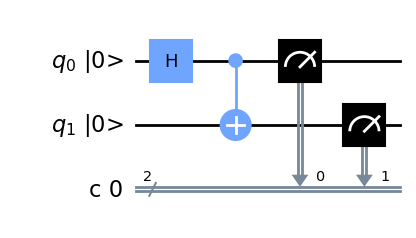

In [3]:
from qiskit import QuantumCircuit, execute, Aer

circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

circuit.draw(output='mpl', justify='none', initial_state=True)

In [33]:
result = execute(circuit, Aer.get_backend('qasm_simulator')).result()

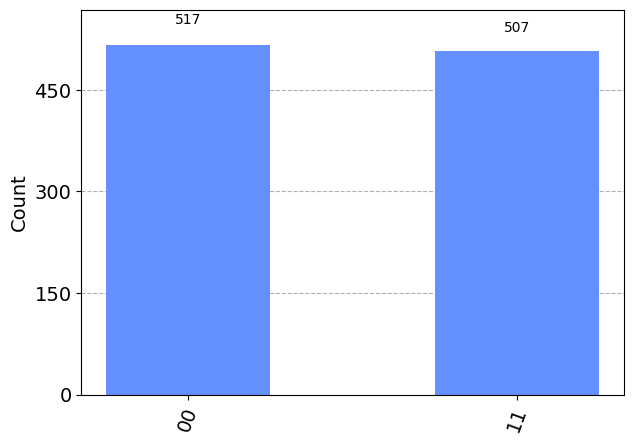

In [34]:
from qiskit.visualization import plot_histogram
counts  = result.get_counts()
plot_histogram(counts)

In [35]:
from sklearn.datasets import load_iris
import pandas as pd

listA = []
listB = []
listC = []

iris = load_iris()

print(iris.target_names)

df = pd.DataFrame(data= iris.data , 
                  columns= ['sepal length', 'sepal width', 'petal length', 'petal width'])
df['target'] = iris.target

for a in range(len(iris.data)):
    if iris.target[a] == 0:
        n = int(round(df['petal width'][a]*5))
        if n <= 1:
            n = 1
        if n not in listA:
            listA.append(n)
        listA = sorted(listA)
        n = int(round(df['petal length'][a]*5))
        if n < 6:
            n = 6
        if n > 8:
            n = 8
        if n not in listB:
            listB.append(n)
        listB = sorted(listB)
        
print(listA, listB)

df

['setosa' 'versicolor' 'virginica']
[1, 2, 3] [6, 7, 8]


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [61]:
import byskit
backend = Aer.get_backend('qasm_simulator')

network = {'root':2,'child-1':3,'child-2':3}

loaded_net = byskit.gen_random_net(network)
b = byskit.byskit(backend, network, loaded_net)
b.plot()

evidence = {
    'one':{
        'n':listA,
        'state':'1'
    },
    'two':{
        'n':listB,
        'state':'0'
    }
}
print(listA, listB)
#b.rejection_sampling(evidence,amplitude_amplification=True)
sample_list = b.rejection_sampling(evidence, shots=1000,amplitude_amplification=False)

for cnta in range(9):
    for cntb in range(9):
        observations = {
            'one':{
                'n':[cnta+1],
                'state':'0'
            },
            'two':{
                'n':[cntb+1],
                'state':'1'
            }
        }
        print("길이: ", cnta+1, ", 너비: ",cntb+1)
        print("%n_________")
        prob = b.evaluate(sample_list, observations)

[1, 2, 3] [6, 7, 8]
1000 samples drawn: 21 samples accepted, 979 samples rejected.
['0111110001', '0111110001', '0111110001', '0111110001', '0111110000', '0111110001', '0111110001', '0111110001', '0111110001', '0111110001', '0111110001', '0111110000', '0111110001', '0111110001', '0111110001', '0111110001', '0111110001', '0111110001', '0111110001', '0111110001', '0111110001']
Percentage of samples rejected:  97.89999999999999 %
길이:  1 , 너비:  1
%n_________
Probabilty of observations given evidence =  0.0
길이:  1 , 너비:  2
%n_________
Probabilty of observations given evidence =  0.0
길이:  1 , 너비:  3
%n_________
Probabilty of observations given evidence =  0.0
길이:  1 , 너비:  4
%n_________
Probabilty of observations given evidence =  0.0
길이:  1 , 너비:  5
%n_________
Probabilty of observations given evidence =  0.0
길이:  1 , 너비:  6
%n_________
Probabilty of observations given evidence =  0.0
길이:  1 , 너비:  7
%n_________
Probabilty of observations given evidence =  0.0
길이:  1 , 너비:  8
%n_________
Pr

In [54]:
#______________________________________________________________________________________________________________________________________

In [37]:
    from qiskit import IBMQ
    IBMQ.load_account()
    #provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
    from qiskit import Aer #BasicAer
    #backend = BasicAer.get_backend('unitary_simulator')
    backend = Aer.get_backend('qasm_simulator')

    #network = {'root':2,'child-1':3,'child-2':3,'child-3':2}
    network = {'root':2,'child-1':3,'child-2':3}

    loaded_net = byskit.gen_random_net(network)
    b = byskit.byskit(backend, network, loaded_net)
    b.plot()

    evidence = {
        'one':{
            'n':[1],
            'state':'1'
        },
        'two':{
            'n':[5],
            'state':'0'
        }
    }
    #b.rejection_sampling(evidence,amplitude_amplification=True)
    sample_list = b.rejection_sampling(evidence, shots=1000,amplitude_amplification=False)

    observations = {
        'one':{
            'n':[2],
            'state':'0'
        },
        'two': {
            'n': [4],
            'state': '1'
        }
    }

    prob = b.evaluate(sample_list, observations)


ibmqfactory.load_account:WARNING:2023-07-17 01:07:40,534: Credentials are already in use. The existing account in the session will be replaced.


1000 samples drawn: 25 samples accepted, 975 samples rejected.
['0111000011', '0101000011', '0101000011', '0101000011', '0101000011', '1101100011', '0101100001', '0101100000', '0101100000', '0101000011', '0101000011', '0101000010', '0101000011', '0101000011', '0111000011', '0101000011', '0101000010', '1101000010', '0101100010', '0101000011', '0101000000', '0101100001', '0111100011', '0101100011', '0101000011']
Percentage of samples rejected:  97.5 %
Probabilty of observations given evidence =  0.28


In [31]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.24.1', 'qiskit-aer': '0.12.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.43.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': '0.6.1'}

In [32]:
import sys
sys.version

'3.10.6 (main, May 29 2023, 11:10:38) [GCC 11.3.0]'